### Imports

In [1]:
from api import *
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Import data

In [3]:
# Import these reports
clean_birmingham_report_df = pd.read_feather('image_time_traffic_reports/clean_birmingham_report_df')
clean_manc_report_df = pd.read_feather('image_time_traffic_reports/clean_manc_report_df')
clean_cam_report_df = pd.read_feather('image_time_traffic_reports/clean_cam_report_df')
clean_thorpe_report_df = pd.read_feather('image_time_traffic_reports/clean_thorpe_report_df')
clean_epping_report_df = pd.read_feather('image_time_traffic_reports/clean_epping_report_df')
clean_bristol_df = pd.read_feather('image_time_traffic_reports/clean_bristol_df')

import copy
road_lengths = pd.read_csv('road_lengths_single_lane.csv') 
traffc_data_england = copy.copy(road_lengths)

clean_train_report_df = pd.concat([clean_birmingham_report_df, clean_manc_report_df, clean_cam_report_df, clean_thorpe_report_df, clean_epping_report_df, clean_bristol_df])


sites = []
for x in list(traffc_data_england.sites):
    sites = sites + x.split(', ')
    
filtered_train_report = clean_train_report_df[['site_name','site_id','report_date','time_period_ending','time_interval','0-520cm','521-660cm','661-1160cm','1160+cm','avg_mph','total_volume','timestamp']][clean_train_report_df.site_id.isin(sites)]

In [4]:
# For a particular row x in road_lengths get the correspoiding traffic data
def area_report(x):
    sites = x.sites.split(', ')
    day, month, year = x.ddmmyy.split('/')
    hour, minute  = x.time.split(':')
    
    # Get the nearest of the 15 minute intervals to compare to
    min_mod_15 = round((int(minute)+1)/15)
    nearest_minute_interval = 15*min_mod_15 - 1
    time = datetime.datetime(int(year),int(month),int(day), int(hour), int(nearest_minute_interval))
    x_report = filtered_train_report[(filtered_train_report.site_id.isin(sites)) & (filtered_train_report.timestamp == time)]
    return x_report

# Add the reports to the dataframe
traffc_data_england['report'] = traffc_data_england.apply(area_report, axis=1)
# Extract values from the report
traffc_data_england['0-520cm'] = traffc_data_england.apply(lambda x: x.report['0-520cm'].mean(), axis=1)
traffc_data_england['521-660cm'] = traffc_data_england.apply(lambda x: x.report['521-660cm'].mean(), axis=1)
traffc_data_england['661-1160cm'] = traffc_data_england.apply(lambda x: x.report['661-1160cm'].mean(), axis=1)
traffc_data_england['1160+cm'] = traffc_data_england.apply(lambda x: x.report['1160+cm'].mean(), axis=1)
traffc_data_england['total_volume'] = traffc_data_england.apply(lambda x: x.report['total_volume'].mean(), axis=1)
traffc_data_england['avg_mph'] = traffc_data_england.apply(lambda x: x.report.avg_mph.astype(int).mean(), axis=1)

In [5]:
traffc_data_england

,ddmmyy,time,area,focus,length,sites,filename,report,0-520cm,521-660cm,661-1160cm,1160+cm,total_volume,avg_mph
0,19/04/2019,12:48,manchester,M60_N_1,1207.090,"17661, 17616, 17597",manchester_M60_N_1,site_name site_id report_date t...,593.000000,78.000000,124.000000,129.000000,924.000000,11.333333
1,19/04/2019,12:48,manchester,M60_N_2,654.677,"17649, 17587",manchester_M60_N_2,site_name site_id report_date t...,374.000000,103.000000,217.000000,225.000000,919.000000,20.000000
2,19/04/2019,12:48,manchester,M60_N_3,635.028,"17559, 17633",manchester_M60_N_3,site_name site_id report_date t...,847.000000,142.500000,130.500000,108.500000,1228.500000,19.500000
3,19/04/2019,12:48,manchester,M60_N_4,1096.200,"17608, 17248",manchester_M60_N_4,site_name site_id report_date t...,909.500000,56.500000,24.500000,31.500000,1022.000000,39.500000
4,19/04/2019,12:48,manchester,M60_N_5,1234.570,"17288, 17850, 17278",manchester_M60_N_5,site_name site_id report_date t...,799.000000,74.500000,25.000000,22.500000,921.000000,72.500000
5,19/04/2019,12:48,manchester,M60_S_1,634.706,"17636, 17666",manchester_M60_S_1,site_name site_id report_date t...,1073.500000,54.500000,43.500000,53.000000,1224.500000,60.000000
6,19/04/2019,12:48,manchester,M60_S_2,914.027,"17618, 17622, 17651",manchester_M60_S_2,site_name site_id report_date t...,1006.333333,70.666667,35.666667,51.333333,1164.000000,61.333333
7,19/04/2019,12:48,manchester,M60_S_3,762.729,17644,manchester_M60_S_3,site_name site_id report_date t...,1375.000000,49.000000,44.000000,76.000000,1544.000000,52.000000
8,19/04/2019,12:48,manchester,M60_S_4,1042.730,"17605, 17571",manchester_M60_S_4,site_name site_id report_date t...,926.000000,65.500000,22.500000,36.000000,1050.000000,59.000000
9,19/04/2019,12:48,manchester,M60_S_5,999.569,"17245, 17285, 17555",manchester_M60_S_5,site_name site_id report_date t...,857.000000,63.333333,17.666667,22.333333,960.333333,67.666667


In [6]:
def predict_traffic_from_detector(data, threshold, pickle_folder):
    
    traffic_data = copy.copy(data)
    # Initially set the column names so they agree with the names in the pickle files
    detections = pd.DataFrame(
       {
           "filename": [],
           "small_car_detections": [],
           "bus_detections": [],
           "pickup_truck_detections": [],
           "utility_truck_detections": [],
           "truck_detections": [],
           "cargo_truck_detections": [],
           "truck_w_box_detections": [],
           "truck_tractor_detections": [],
           "trailer_detections": [],
           "truck_w_flatbed_detections": [],
           "truck_w_liquid_detections": [],
           "all_vehicle_detections": [],

       }
    )

    # Import the predictions the pickle files
    prediction_lists = defaultdict()

    for i, file in enumerate(os.listdir(pickle_folder)):
        with (open(os.path.join(pickle_folder, file), "rb")) as f:
            prediction_list = pickle.load(f)
        filename = file.split('.')[0]
        prediction_lists[filename] = prediction_list
        counts = defaultdict(int)
        for pred in prediction_list:
            if pred.score.value > threshold:
                counts[pred.category.name] +=1

        detections.loc[i] = [filename, 
                     counts["Small Car"],
                     counts["Bus"],
                     counts["Pickup Truck"],
                     counts["Utility Truck"],
                     counts["Truck"],
                     counts["Cargo Truck"],
                     counts["Truck w/Box"],
                     counts["Truck Tractor"],
                     counts["Trailer"],
                     counts["Truck w/Flatbed"],
                     counts["Truck w/Liquid"],
                     sum([x for x in counts.values()])]
        
    # combine the reports    
    def detection_report(x):
        detections_report = detections[detections.filename == x.filename]
        return detections_report
    
    traffic_data['det_report'] = traffic_data.apply(detection_report, axis=1)
    
    # get the detection numbers
    traffic_data['small_car_detections'] = traffic_data.apply(lambda x: x.det_report.small_car_detections.sum(), axis=1)
    traffic_data['bus_detections'] = traffic_data.apply(lambda x: x.det_report.bus_detections.sum(), axis=1)
    traffic_data['pickup_truck_detections'] = traffic_data.apply(lambda x: x.det_report.pickup_truck_detections.sum(), axis=1)
    traffic_data['utility_truck_detections'] = traffic_data.apply(lambda x: x.det_report.utility_truck_detections.sum(), axis=1)
    traffic_data['truck_detections'] = traffic_data.apply(lambda x: x.det_report.truck_detections.sum(), axis=1)
    traffic_data['cargo_truck_detections'] = traffic_data.apply(lambda x: x.det_report.cargo_truck_detections.sum(), axis=1)
    traffic_data['truck_w_box_detections'] = traffic_data.apply(lambda x: x.det_report.truck_w_box_detections.sum(), axis=1)
    traffic_data['truck_tractor_detections'] = traffic_data.apply(lambda x: x.det_report.truck_tractor_detections.sum(), axis=1)
    traffic_data['trailer_detections'] = traffic_data.apply(lambda x: x.det_report.trailer_detections.sum(), axis=1)
    traffic_data['truck_w_flatbed_detections'] = traffic_data.apply(lambda x: x.det_report.truck_w_flatbed_detections.sum(), axis=1)
    traffic_data['truck_w_liquid_detections'] = traffic_data.apply(lambda x: x.det_report.truck_w_liquid_detections.sum(), axis=1)
    traffic_data['all_vehicle_detections'] = traffic_data.apply(lambda x: x.det_report.all_vehicle_detections.sum(), axis=1)

    # Predict the traffic count from these detections via raodlength and avg speed
    traffic_data['length_milles'] = traffic_data.length.apply(lambda x: x/1000 *5/8)
    traffic_data['time_to_cross_hour'] = traffic_data.apply(lambda x : x.length_milles/x.avg_mph , axis=1)
    traffic_data['time_to_cross_min'] = traffic_data.apply(lambda x : x.time_to_cross_hour * 60 , axis=1)

    detection_cols = ['small_car_detections',
     'bus_detections',
     'pickup_truck_detections',
     'utility_truck_detections',
     'truck_detections',
     'cargo_truck_detections',
     'truck_w_box_detections',
     'truck_tractor_detections',
     'trailer_detections',
     'truck_w_flatbed_detections',
     'truck_w_liquid_detections',
     'all_vehicle_detections']

    for col in detection_cols:
        pred_col = col.replace('detections', 'pred')
        traffic_data[pred_col] = traffic_data[col] * 15 / traffic_data['time_to_cross_min']
        
    return traffic_data

In [7]:
pickle_folder = '../inference/inference-WV3/yolov5-low-threshold2/pickles'
traffic_data_yolov5 = predict_traffic_from_detector(traffc_data_england, 0.15, pickle_folder)
traffic_data_yolov5[['filename', 'length', 'avg_mph', 'total_volume', 'all_vehicle_detections', 'length_milles', 'time_to_cross_min', 'all_vehicle_pred']]

,filename,length,avg_mph,total_volume,all_vehicle_detections,length_milles,time_to_cross_min,all_vehicle_pred
0,manchester_M60_N_1,1207.090,11.333333,924.000000,189,0.754431,3.994048,709.806228
1,manchester_M60_N_2,654.677,20.000000,919.000000,136,0.409173,1.227519,1661.888229
2,manchester_M60_N_3,635.028,19.500000,1228.500000,136,0.396893,1.221208,1670.477522
3,manchester_M60_N_4,1096.200,39.500000,1022.000000,43,0.685125,1.040696,619.777413
4,manchester_M60_N_5,1234.570,72.500000,921.000000,38,0.771606,0.638571,892.618483
5,manchester_M60_S_1,634.706,60.000000,1224.500000,20,0.396691,0.396691,756.255652
6,manchester_M60_S_2,914.027,61.333333,1164.000000,22,0.571267,0.558848,590.500427
7,manchester_M60_S_3,762.729,52.000000,1544.000000,29,0.476706,0.550045,790.844455
8,manchester_M60_S_4,1042.730,59.000000,1050.000000,24,0.651706,0.662752,543.189512
9,manchester_M60_S_5,999.569,67.666667,960.333333,23,0.624731,0.553948,622.801761


In [9]:
from scipy.stats import pearsonr

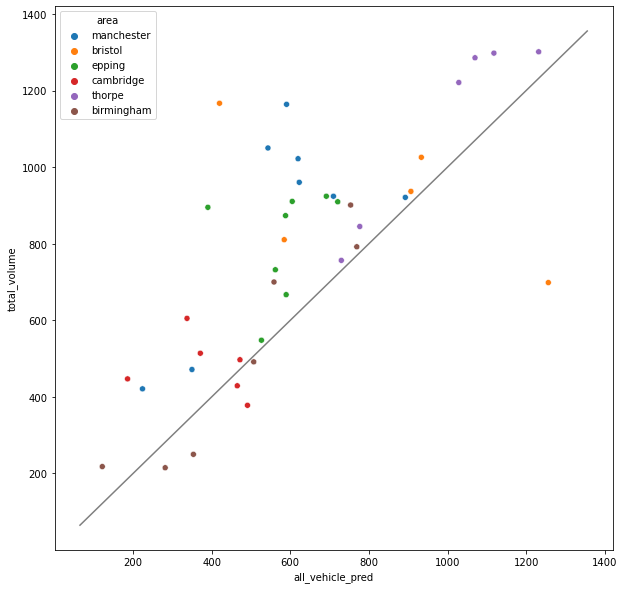

rmse 265.22035247375476, mape. 0.2646140856667836, corr 0.7192082167335289


In [10]:
plot_data = traffic_data_yolov5[traffic_data_yolov5.length > 900]
plot_data = plot_data[plot_data.filename != 'epping_MS5_W_3'].reset_index(drop=True)
#plot_data = traffic_data_yolov5
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='all_vehicle_pred', y='total_volume', hue='area', data=plot_data, ax=ax)
        
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# now plot both limits against eachother
plt.plot(lims, lims, 'k-', alpha=0.5)
        
plt.show()

mse = ((plot_data.total_volume.values - plot_data.all_vehicle_pred.values)**2).sum()/len(plot_data)
mape = np.absolute(((plot_data.total_volume.values - plot_data.all_vehicle_pred.values) / plot_data.total_volume.values)).mean()
corr = pearsonr(plot_data.total_volume.values, plot_data.all_vehicle_pred.values)[0]

print(f"rmse {mse**0.5}, mape. {mape}, corr {corr}")

In [12]:
cols_to_keep = ['ddmmyy',
 'time',
 'area',
 'focus',
 'length',
 'sites',
 'filename',
 '0-520cm',
 '521-660cm',
 '661-1160cm',
 '1160+cm',
 'total_volume',
 'avg_mph',
 'small_car_detections',
 'bus_detections',
 'pickup_truck_detections',
 'utility_truck_detections',
 'truck_detections',
 'cargo_truck_detections',
 'truck_w_box_detections',
 'truck_tractor_detections',
 'trailer_detections',
 'truck_w_flatbed_detections',
 'truck_w_liquid_detections',
 'all_vehicle_detections',
 'length_milles',
 'time_to_cross_hour',
 'time_to_cross_min',
 'small_car_pred',
 'bus_pred',
 'pickup_truck_pred',
 'utility_truck_pred',
 'truck_pred',
 'cargo_truck_pred',
 'truck_w_box_pred',
 'truck_tractor_pred',
 'trailer_pred',
 'truck_w_flatbed_pred',
 'truck_w_liquid_pred',
 'all_vehicle_pred']

In [13]:
plot_data[cols_to_keep]

,ddmmyy,time,area,focus,length,sites,filename,0-520cm,521-660cm,661-1160cm,...,pickup_truck_pred,utility_truck_pred,truck_pred,cargo_truck_pred,truck_w_box_pred,truck_tractor_pred,trailer_pred,truck_w_flatbed_pred,truck_w_liquid_pred,all_vehicle_pred
0,19/04/2019,12:48,manchester,M60_N_1,1207.090,"17661, 17616, 17597",manchester_M60_N_1,593.000000,78.000000,124.000000,...,0.0,0.0,33.800297,3.755589,0.000000,0.0,0.0,0.0,0.0,709.806228
1,19/04/2019,12:48,manchester,M60_N_4,1096.200,"17608, 17248",manchester_M60_N_4,909.500000,56.500000,24.500000,...,0.0,0.0,43.240285,0.000000,0.000000,0.0,0.0,0.0,0.0,619.777413
2,19/04/2019,12:48,manchester,M60_N_5,1234.570,"17288, 17850, 17278",manchester_M60_N_5,799.000000,74.500000,25.000000,...,0.0,0.0,23.489960,23.489960,0.000000,0.0,0.0,0.0,0.0,892.618483
3,19/04/2019,12:48,manchester,M60_S_2,914.027,"17618, 17622, 17651",manchester_M60_S_2,1006.333333,70.666667,35.666667,...,0.0,0.0,53.681857,0.000000,26.840928,0.0,0.0,0.0,0.0,590.500427
4,19/04/2019,12:48,manchester,M60_S_4,1042.730,"17605, 17571",manchester_M60_S_4,926.000000,65.500000,22.500000,...,0.0,0.0,22.632896,0.000000,0.000000,0.0,0.0,0.0,0.0,543.189512
5,19/04/2019,12:48,manchester,M60_S_5,999.569,"17245, 17285, 17555",manchester_M60_S_5,857.000000,63.333333,17.666667,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,622.801761
6,19/04/2019,12:48,manchester,M602_E_1,2103.560,"5509, 2227",manchester_M602_E_1,345.000000,31.000000,31.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,224.001217
7,19/04/2019,12:48,manchester,M602_W_1,2232.900,"1993, 1563",manchester_M602_W_1,334.000000,107.500000,16.500000,...,0.0,0.0,11.285772,11.285772,0.000000,0.0,0.0,0.0,0.0,349.858928
8,08/08/2020,11:08,bristol,M4_N_1,1860.010,"5944, 5994, 3852, 1367",bristol_M4_N_1,648.750000,15.250000,16.000000,...,0.0,0.0,11.021446,11.021446,11.021446,0.0,0.0,0.0,0.0,1256.444858
9,08/08/2020,11:08,bristol,M4_N_2,2942.420,"1382, 2646, 2569, 6041, 1260, 1561",bristol_M4_N_2,661.500000,71.000000,35.666667,...,0.0,0.0,10.195689,6.797126,3.398563,0.0,0.0,0.0,0.0,584.552851


In [14]:
plot_data[cols_to_keep].to_feather('predictions/traffic-counts/pred_traffic_counts_yolov5')

In [19]:
predictions = clean_birmingham_report_df.groupby('timestamp')['total_volume_normalised'].median().to_frame().reset_index()
predictions

,timestamp,total_volume_normalised
0,2021-06-15 00:14:00,0.232333
1,2021-06-15 00:29:00,0.198698
2,2021-06-15 00:44:00,0.220811
3,2021-06-15 00:59:00,0.190041
4,2021-06-15 01:13:00,0.168937
...,...,...
97,2021-06-15 23:13:00,0.134271
98,2021-06-15 23:14:00,0.340755
99,2021-06-15 23:29:00,0.272907
100,2021-06-15 23:44:00,0.281736


In [22]:
predictions.total_volume_normalised.mean()

0.9537101742735854

In [25]:
clean_birmingham_report_df.timestamp.dt.year == 2021

0       True
1       True
2       True
3       True
4       True
        ... 
4983    True
4984    True
4985    True
4986    True
4987    True
Name: timestamp, Length: 4988, dtype: bool

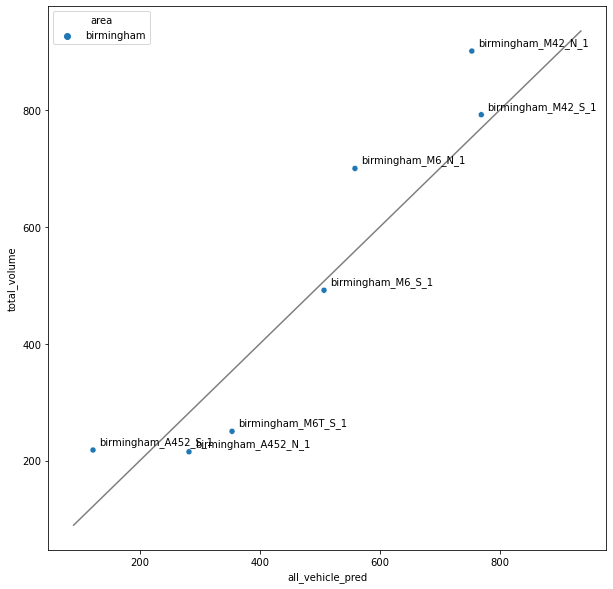

rmse 97.82266157886069, mape. 0.22748813127713657


In [9]:
#plot_data = traffic_data_yolov5[traffic_data_yolov5.length > 900].reset_index(drop=True)
plot_data = traffic_data_yolov5[traffic_data_yolov5.length > 900]
plot_data = plot_data[plot_data.area=='birmingham'].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='all_vehicle_pred', y='total_volume', hue='area', data=plot_data, ax=ax)
for i in range(plot_data.shape[0]):
     plt.text(plot_data.all_vehicle_pred[i]+10, plot_data.total_volume[i]+10, plot_data.filename[i])
        
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# now plot both limits against eachother
plt.plot(lims, lims, 'k-', alpha=0.5)
        
plt.show()

mse = ((plot_data.total_volume.values - plot_data.all_vehicle_pred.values)**2).sum()/len(plot_data)
mape = np.absolute(((plot_data.total_volume.values - plot_data.all_vehicle_pred.values) / plot_data.total_volume.values)).mean()

print(f"rmse {mse**0.5}, mape. {mape}")

### Error Analysis

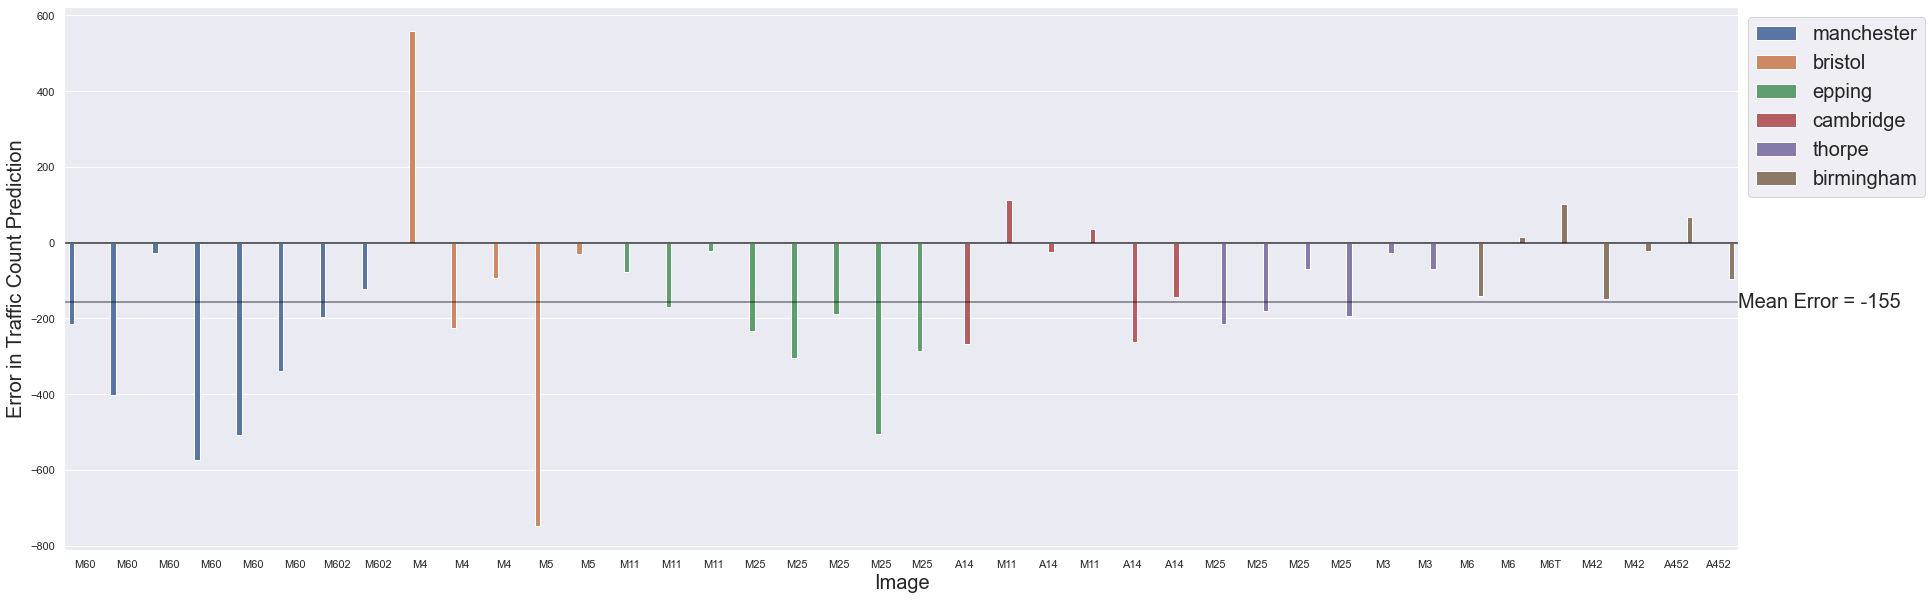

In [202]:
plot_data['error'] = plot_data.all_vehicle_pred.values - plot_data.total_volume.values

fig, ax = plt.subplots(figsize=(30,10))

graph = sns.barplot(x="filename", y="error", hue="area", data=plot_data, ax=ax)
ax.axhline(plot_data.error.mean(), color='black', alpha=0.5)
ax.axhline(0, color='black', alpha = 0.8)    
ax.legend(fontsize=20, bbox_to_anchor= (1,1))
ax.text(39.5, plot_data.error.mean(), f'Mean Error = {int(plot_data.error.mean())}', size=20, va='center')
plt.ylabel('Error in Traffic Count Prediction', fontsize=20)
plt.xlabel('Image', fontsize=20)

labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set(xticklabels=[x.split('_')[1] for x in labels])

plt.show()

In [ ]:
ax.text(39.5, plot_data.error.mean(), f'Mean Error = {int(plot_data.error.mean())}', size=20, va='center')
for containter in ax.containers:
    ax.bar_label(containter, labels=plot_data.focus, padding=2)

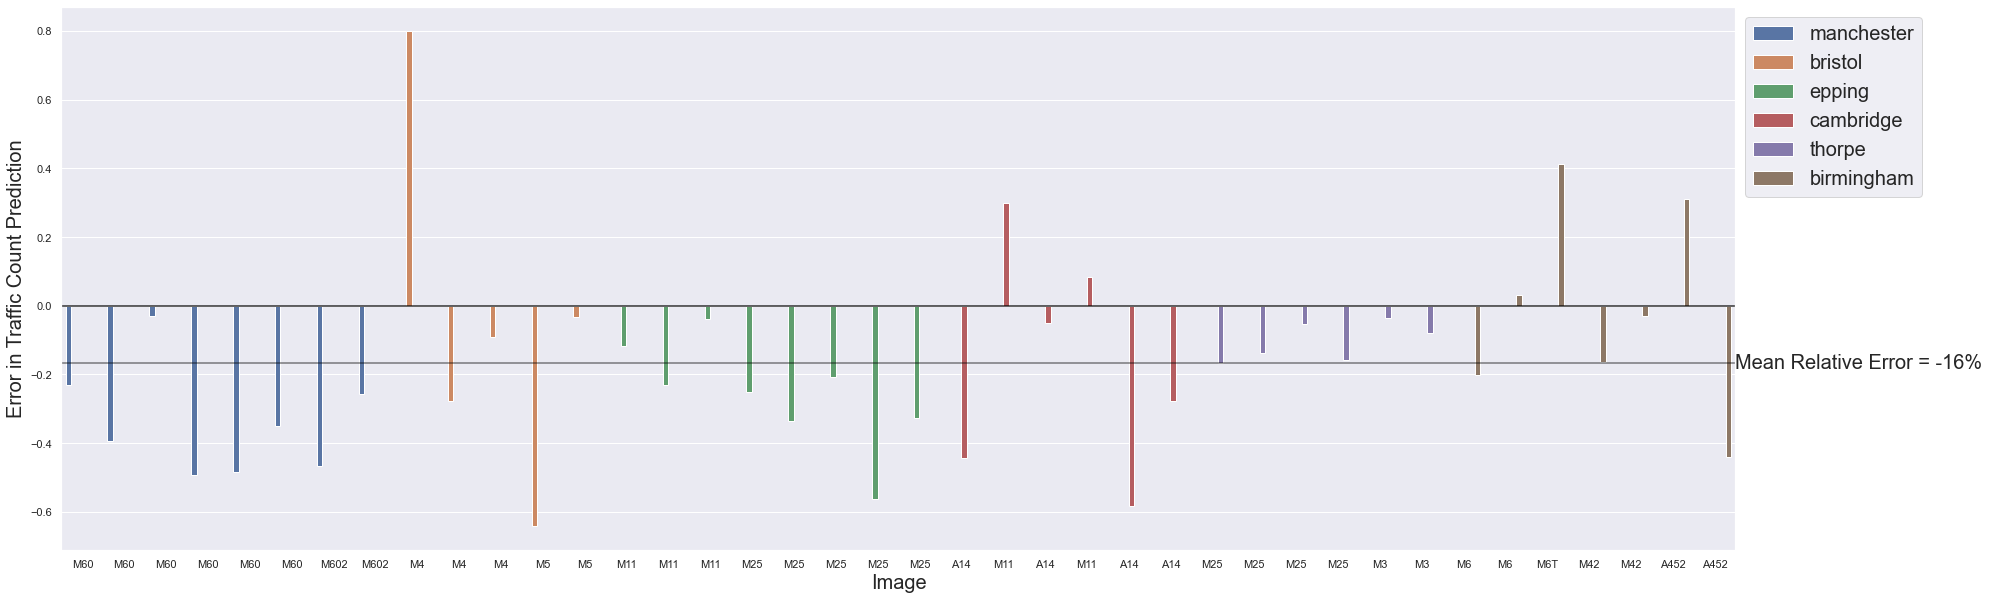

In [201]:
plot_data['percent_error'] = (plot_data.all_vehicle_pred.values - plot_data.total_volume.values) / plot_data.total_volume.values

fig, ax = plt.subplots(figsize=(30,10))

graph = sns.barplot(x="filename", y="percent_error", hue="area", data=plot_data, ax=ax)
ax.axhline(plot_data.percent_error.mean(), color='black', alpha=0.5)
ax.axhline(0, color='black', alpha = 0.8)    
ax.legend(fontsize=20, bbox_to_anchor= (1,1))
ax.text(39.5, plot_data.percent_error.mean(), f'Mean Relative Error = {int(100*plot_data.percent_error.mean())}%', size=20, va='center')
plt.ylabel('Error in Traffic Count Prediction', fontsize=20)
plt.xlabel('Image', fontsize=20)

labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set(xticklabels=[x.split('_')[1] for x in labels])

plt.show()

We see an overprediction of traffic at the M4 in Bristol. This overprediction could be attributed to varying speeds across the image. The lower part of the image has denser traffic and a lower average speed. However upon taking the average speed of all locations we may be overestimating the vehicle speed and therfore the number of vehicles passing the image.

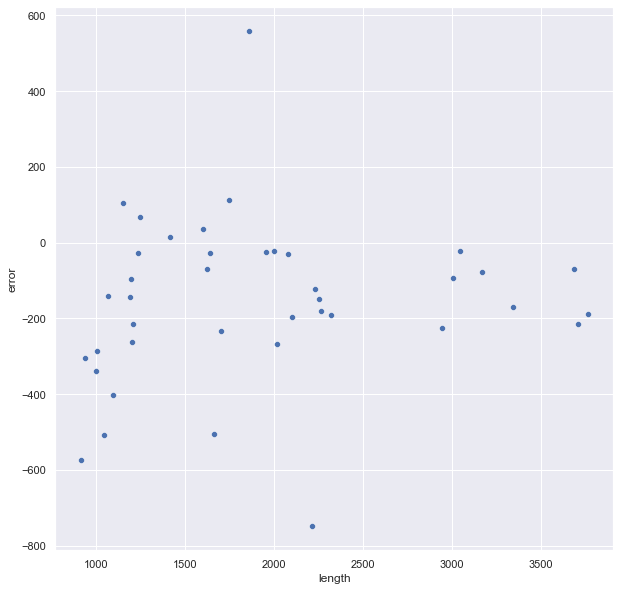

In [211]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="length", y="error", data=plot_data, ax=ax)
plt.show()

In [215]:
plot_data.columns

Index(['ddmmyy', 'time', 'area', 'focus', 'length', 'sites', 'filename',
       'report', '0-520cm', '521-660cm', '661-1160cm', '1160+cm',
       'total_volume', 'avg_mph', 'det_report', 'small_car_detections',
       'bus_detections', 'pickup_truck_detections', 'utility_truck_detections',
       'truck_detections', 'cargo_truck_detections', 'truck_w_box_detections',
       'truck_tractor_detections', 'trailer_detections',
       'truck_w_flatbed_detections', 'truck_w_liquid_detections',
       'all_vehicle_detections', 'length_milles', 'time_to_cross_hour',
       'time_to_cross_min', 'small_car_pred', 'bus_pred', 'pickup_truck_pred',
       'utility_truck_pred', 'truck_pred', 'cargo_truck_pred',
       'truck_w_box_pred', 'truck_tractor_pred', 'trailer_pred',
       'truck_w_flatbed_pred', 'truck_w_liquid_pred', 'all_vehicle_pred',
       'error', 'percent_error'],
      dtype='object')

Error appeared unaffected by the road lenngth.

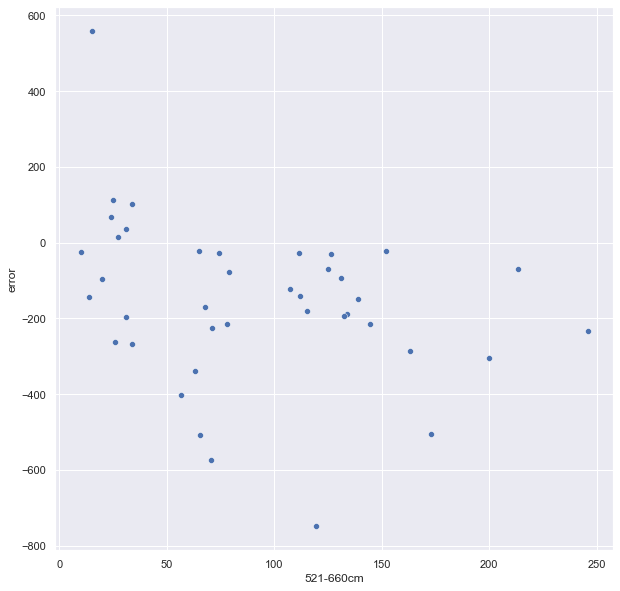

In [218]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="521-660cm", y="error", data=plot_data, ax=ax)
plt.show()

There was no evidence that the number of long vehicles had an affect on error.

### Optimise threshold

In [13]:
pickle_folder = '../inference/inference-WV3/yolov5-low-threshold/pickles'
predictions = {}
mse_dict = {}
for x in range(5,100,5):
    threshold = x/100
    predictions[threshold] = predict_traffic_from_detector(traffc_data_england, threshold, pickle_folder)
    mse = ((predictions[threshold].total_volume.values - predictions[threshold].all_vehicle_pred.values)**2).sum()/len(predictions[threshold])
    mse_dict[threshold] = mse
    
    

best_threshold = min(mse_dict, key=mse_dict.get)
print(f"the best threshold {best_threshold} gives rmse {mse_dict[best_threshold]**0.5}")    

the best threshold 0.25 gives rmse 439.6783804584062


In [14]:
pickle_folder = '../inference/inference-WV3/tood-low-threshold/pickles'
predictions = {}
mse_dict = {}
for x in range(5,100,5):
    threshold = x/100
    predictions[threshold] = predict_traffic_from_detector(traffc_data_england, threshold, pickle_folder)
    mse = ((predictions[threshold].total_volume.values - predictions[threshold].all_vehicle_pred.values)**2).sum()/len(predictions[threshold])
    mse_dict[threshold] = mse
    
    

best_threshold = min(mse_dict, key=mse_dict.get)
print(f"the best threshold {best_threshold} gives rmse {mse_dict[best_threshold]**0.5}")    

the best threshold 0.15 gives rmse 518.220374967747


### Inspect data

In [55]:
time = datetime.datetime(2020,8,8,11,14)

In [59]:
sites = [3071, 3434, 1532, 5545, 4785]
site_ids = [str(site) for site in sites]

clean_train_report_df[(clean_train_report_df.timestamp==time) & (clean_train_report_df.site_id.isin(site_ids))]

,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,total_volume,timestamp,0-520cm_normalised,521-660cm_normalised,661-1160cm_normalised,1160+cm_normalised,total_volume_normalised
2348,M5/8335B,1532,2020-08-08T00:00:00,11:14:00,44,930,129,68,36,53,1163,2020-08-08 11:14:00,1.923350,1.674645,2.314073,1.549776,1.896679
3788,M5/8341B,3071,2020-08-08T00:00:00,11:14:00,44,959,98,65,42,54,1164,2020-08-08 11:14:00,1.925824,1.523563,2.214336,1.860637,1.895090
4364,M5/8338B,3434,2020-08-08T00:00:00,11:14:00,44,947,117,63,36,53,1163,2020-08-08 11:14:00,1.931380,1.666222,2.184182,1.602225,1.900780
5804,M5/8327B,4785,2020-08-08T00:00:00,11:14:00,44,953,119,67,35,51,1174,2020-08-08 11:14:00,1.940896,1.638084,2.284091,1.591663,1.909008
6476,M5/8332B,5545,2020-08-08T00:00:00,11:14:00,44,930,135,69,36,53,1170,2020-08-08 11:14:00,1.932049,1.726389,2.312042,1.584594,1.911407


### Plot

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import json
import copy

In [18]:
def plot_image(img_name, plot_size, threshold):
    im = Image.open('../inference/WV3/' + img_name + '.tiff')
    picke_path = '../inference/inference-WV3/yolov5-low-threshold2/pickles/' + img_name + '.pickle'
    with (open(picke_path, "rb")) as f:
        bboxes = pickle.load(f)
    
    # Make Plot
    fig, ax = plt.subplots(figsize=(plot_size,plot_size))
    ax.imshow(im)
    
    for box in bboxes:
        if box.score.value >= threshold:
            x,y,w,h = box.bbox.to_coco_bbox()
            # Create a Rectangle patch
            rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
            # Add the patch to the Axes
            ax.add_patch(rect)

    plt.show()
    


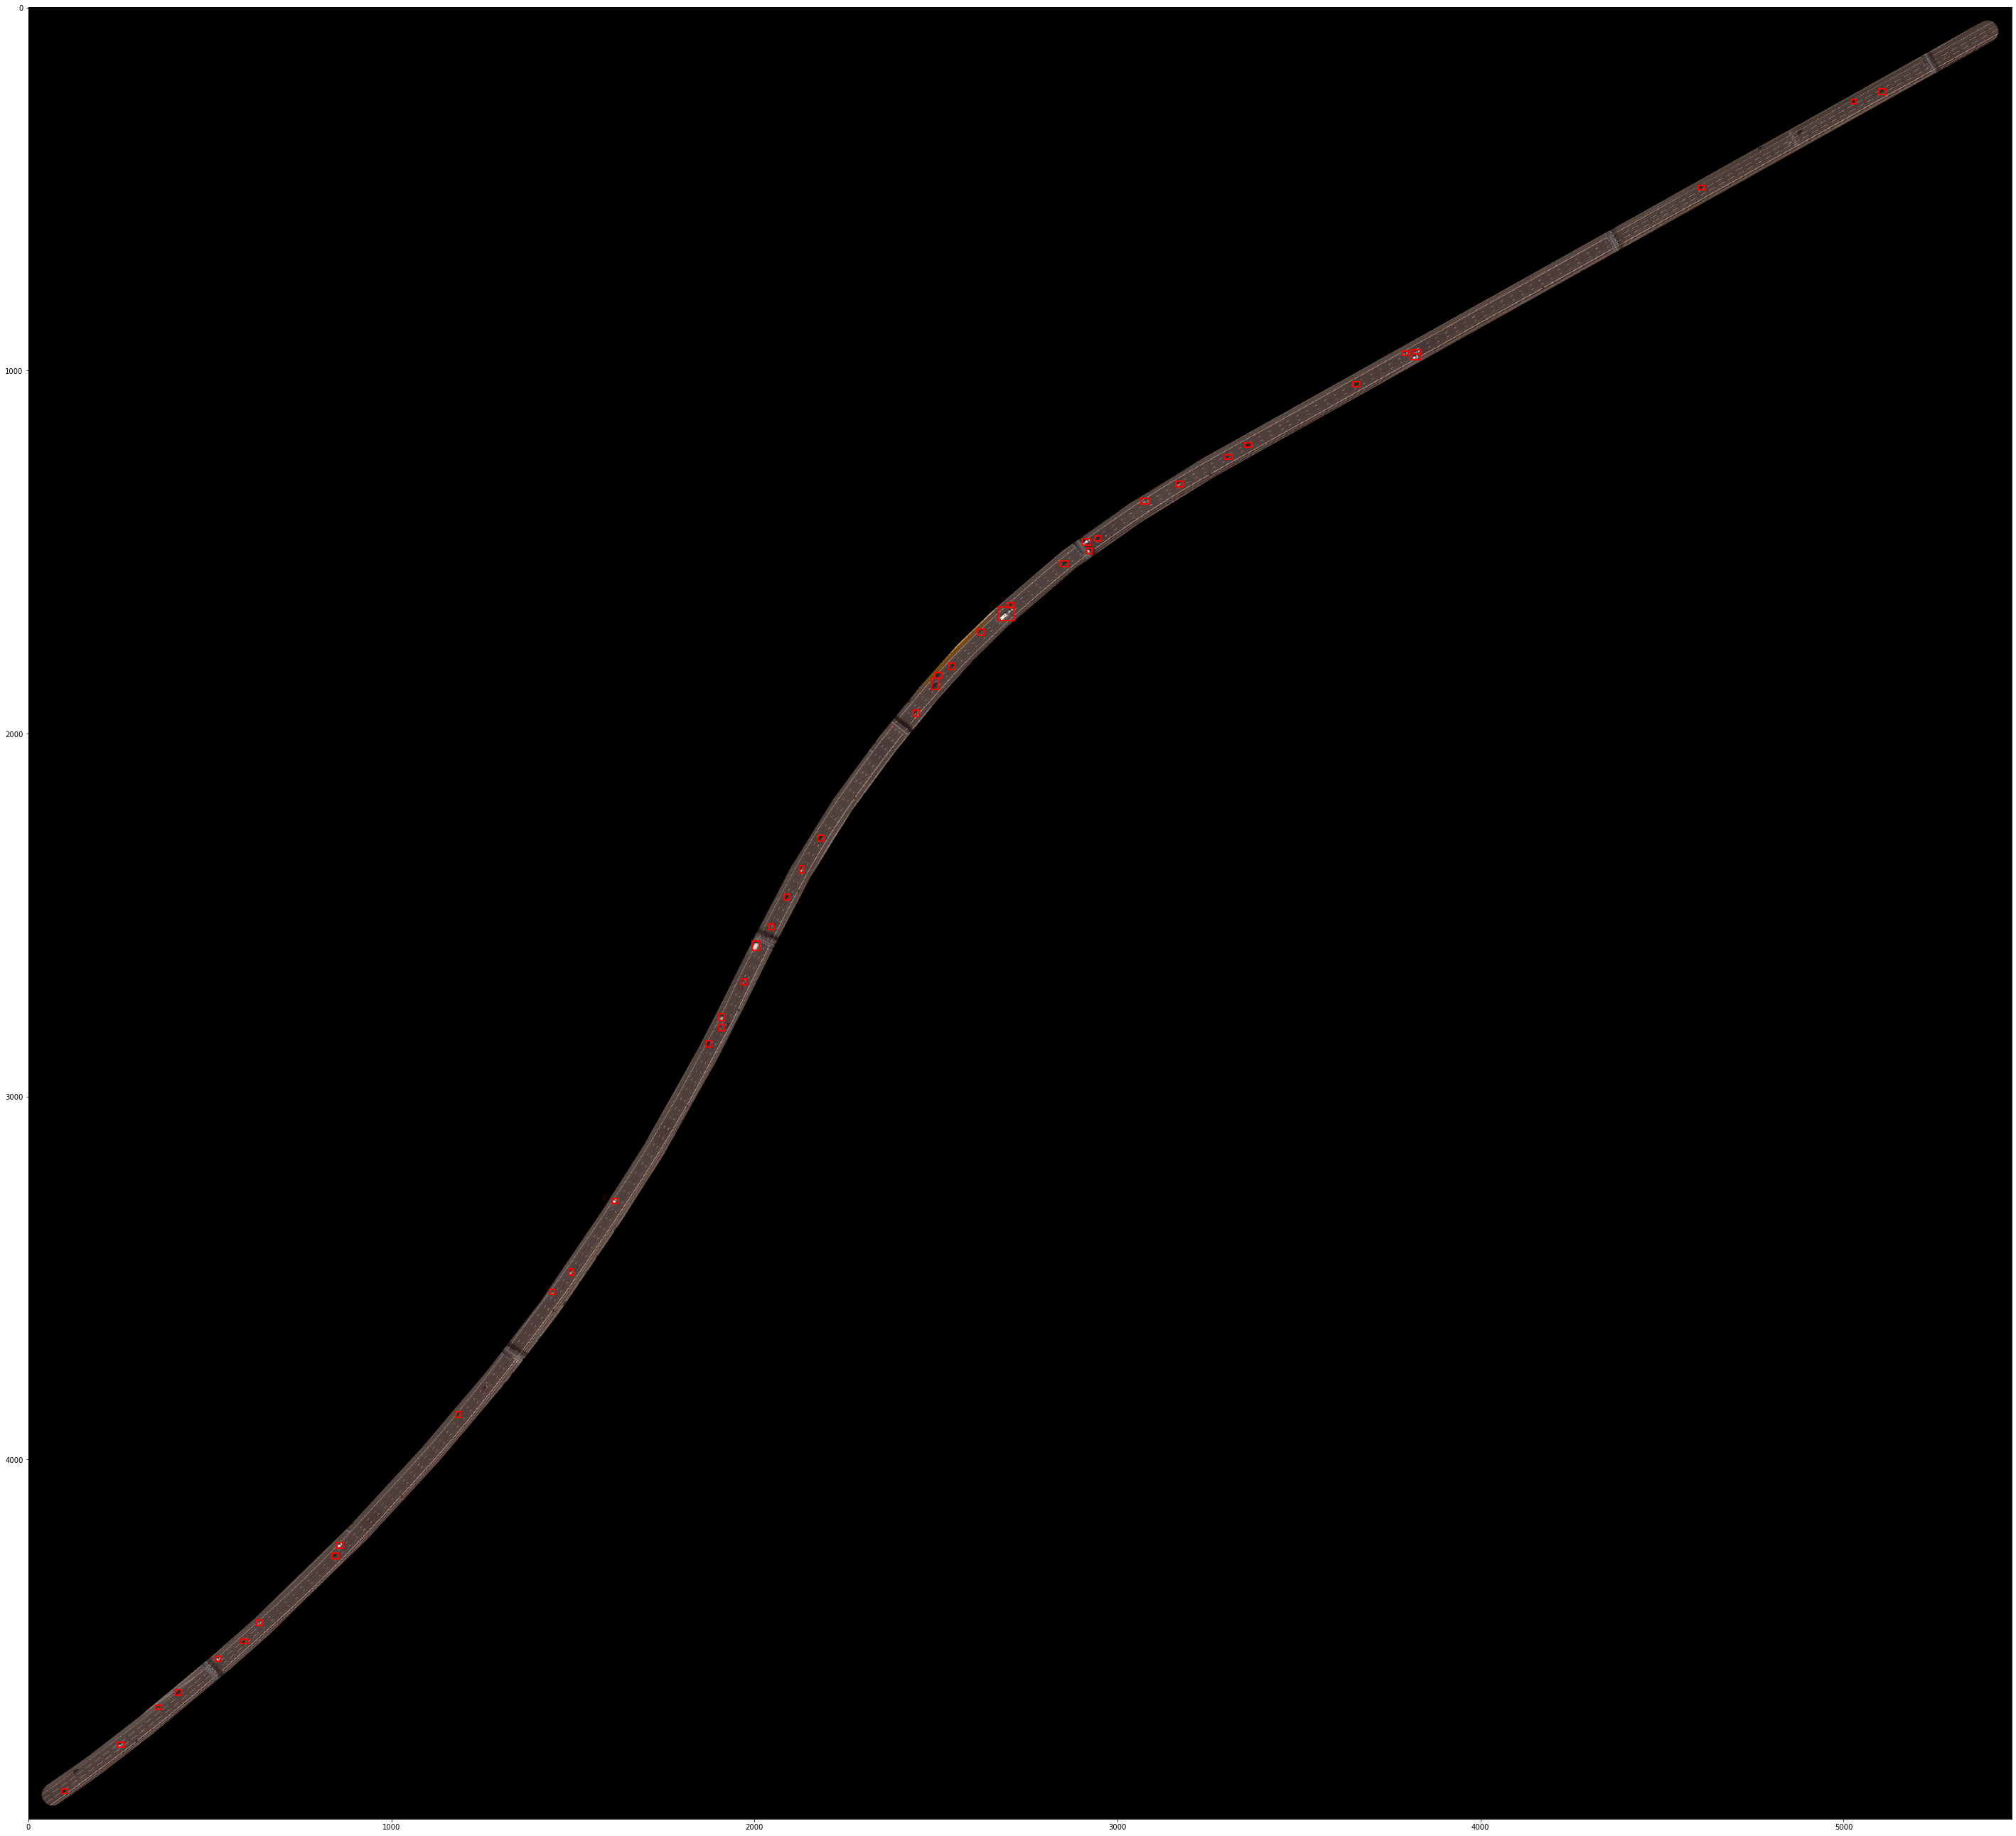

In [57]:
plot_image('bristol_M5_E_1', 50, 0.15)